In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/multi_modal_genre_classifier/

/content/drive/MyDrive/multi_modal_genre_classifier


In [ ]:
import pandas as pd
df_metadata = pd.read_parquet('4mula_small.parquet')
df_metadata.head()

,music_id,music_name,music_lang,music_lyrics,art_id,art_name,art_rank,main_genre,related_genre,related_art,related_music,musicnn_tags,melspectrogram
0,3ade68b6gc207fda3,I've Got To See You Again,en,Line on your face don't bother me\nDown in my ...,3ade68b6gfd79eda3,Norah Jones,353,Jazz,"['Jazz', 'Blues', 'Soul Music', 'Country', 'Ro...","[{'id': '3ade68b6g9a3beda3', 'name': 'Joss Sto...","[{'id': '3ade68b7gdddfcea3', 'name': 'Ten Phan...","['piano','drums','slow']","[[136.96524, 135.869965, 118.730804, 133.62802..."
1,3ade68b8g9410afa3,New Perspective,en,I feel the salty waves come in\nI feel them cr...,3ade68b6g2480fda3,Panic! At The Disco,154,Alternative Rock,"['Rock Alternativo', 'Pop/Punk', 'Pop/Rock', '...","[{'id': '3ade68b6gc5baeda3', 'name': 'Fall Out...","[{'id': '3ade68b7gc6144ea3', 'name': 'Wake Me ...","['rock','pop','guitar']","[[6.28145981, 1.50680351, 0.260610491, 0.17753..."
2,3ade68b7gb67d7ea3,Renúncia,pt-br,Hoje não existe nada mais entre nós\nSomos dua...,3ade68b5gef48eda3,Nelson Gonçalves,446,MPB,"['MPB', 'Velha Guarda', 'Romântico', 'Samba', ...","[{'id': '3ade68b5gf058eda3', 'name': 'Orlando ...","[{'id': '3ade68b6gbab1fda3', 'name': 'As Rosas...","['male','classical','male vocal']","[[0.905277014, 0.33714968, 0.210445538, 0.1545..."
3,3ade68b8gcd12d0b3,Good Form,en,"Eardrummers\nUh, uh, huh, uh, huh\nUh, yo, hol...",3ade68b7gc2b61ea3,Nicki Minaj,421,Rap,"['Rap', 'Pop', 'Hip Hop', 'R&B', 'Dance', 'Ele...","[{'id': '3ade68b5g8d18eda3', 'name': 'Lil Wayn...",[],"['techno','electronic','beat']","[[2.005826, 0.721350968, 0.2188458, 0.23778049..."
4,3ade68b7g955b3ea3,Out Of Time,en,You don't know what's going on\nYou've been aw...,3ade68b6g28c9eda3,Rolling Stones,118,Classic Rock,"['Classic Rock', 'Rock', 'Blues', 'R&B', 'Hard...","[{'id': '3ade68b6g7d5aeda3', 'name': 'Mick Jag...","[{'id': '3ade68b7g9ae20ea3', 'name': 'Run Of T...","['guitar','vocal','drums']","[[0.200993568, 0.232473925, 0.227112547, 0.139..."


In [ ]:
df_metadata.value_counts('music_lang')

music_lang
en       4723
pt-br    4655
es        246
pt         37
dtype: int64

In [ ]:
df = df_metadata.loc[df_metadata['music_lang'].isin(['en','pt-br'])]
df.head()

,music_id,music_name,music_lang,music_lyrics,art_id,art_name,art_rank,main_genre,related_genre,related_art,related_music,musicnn_tags,melspectrogram
0,3ade68b6gc207fda3,I've Got To See You Again,en,Line on your face don't bother me\nDown in my ...,3ade68b6gfd79eda3,Norah Jones,353,Jazz,"['Jazz', 'Blues', 'Soul Music', 'Country', 'Ro...","[{'id': '3ade68b6g9a3beda3', 'name': 'Joss Sto...","[{'id': '3ade68b7gdddfcea3', 'name': 'Ten Phan...","['piano','drums','slow']","[[136.96524, 135.869965, 118.730804, 133.62802..."
1,3ade68b8g9410afa3,New Perspective,en,I feel the salty waves come in\nI feel them cr...,3ade68b6g2480fda3,Panic! At The Disco,154,Alternative Rock,"['Rock Alternativo', 'Pop/Punk', 'Pop/Rock', '...","[{'id': '3ade68b6gc5baeda3', 'name': 'Fall Out...","[{'id': '3ade68b7gc6144ea3', 'name': 'Wake Me ...","['rock','pop','guitar']","[[6.28145981, 1.50680351, 0.260610491, 0.17753..."
2,3ade68b7gb67d7ea3,Renúncia,pt-br,Hoje não existe nada mais entre nós\nSomos dua...,3ade68b5gef48eda3,Nelson Gonçalves,446,MPB,"['MPB', 'Velha Guarda', 'Romântico', 'Samba', ...","[{'id': '3ade68b5gf058eda3', 'name': 'Orlando ...","[{'id': '3ade68b6gbab1fda3', 'name': 'As Rosas...","['male','classical','male vocal']","[[0.905277014, 0.33714968, 0.210445538, 0.1545..."
3,3ade68b8gcd12d0b3,Good Form,en,"Eardrummers\nUh, uh, huh, uh, huh\nUh, yo, hol...",3ade68b7gc2b61ea3,Nicki Minaj,421,Rap,"['Rap', 'Pop', 'Hip Hop', 'R&B', 'Dance', 'Ele...","[{'id': '3ade68b5g8d18eda3', 'name': 'Lil Wayn...",[],"['techno','electronic','beat']","[[2.005826, 0.721350968, 0.2188458, 0.23778049..."
4,3ade68b7g955b3ea3,Out Of Time,en,You don't know what's going on\nYou've been aw...,3ade68b6g28c9eda3,Rolling Stones,118,Classic Rock,"['Classic Rock', 'Rock', 'Blues', 'R&B', 'Hard...","[{'id': '3ade68b6g7d5aeda3', 'name': 'Mick Jag...","[{'id': '3ade68b7g9ae20ea3', 'name': 'Run Of T...","['guitar','vocal','drums']","[[0.200993568, 0.232473925, 0.227112547, 0.139..."


In [ ]:
df.value_counts('main_genre')

main_genre
Gospel/Religious    1165
Pop                  912
Romantic             905
Rock                 608
Sertanejo            576
Pop/Rock             490
MPB                  471
Alternative Rock     405
Hip Hop              327
Dance                312
Rap                  271
Indie                251
Samba                236
Soundtrack           227
R&B                  169
Kids                 150
Pagode               130
Hard Rock            124
Soul Music           123
Soft Rock            119
Electronic           116
Forró                114
Reggae               109
Folk                 101
Unknown               85
Surf Music            75
Black Music           73
Jazz                  73
Axé                   68
House                 47
Samba Enredo          44
Gothic                42
Funk Carioca          42
Punk Rock             40
Bossa Nova            40
Grunge                39
Piano Rock            36
Heavy Metal           36
New Wave              36
Progressive   

In [ ]:
df = df.loc[df['main_genre'].isin(['Romantic','Pop','Indie','Gospel/Religious','Hip Hop','Sertanejo','Rock','Pop/Rock','MPB','Alternative Rock'])]
df.head()

,music_id,music_name,music_lang,music_lyrics,art_id,art_name,art_rank,main_genre,related_genre,related_art,related_music,musicnn_tags,melspectrogram
1,3ade68b8g9410afa3,New Perspective,en,I feel the salty waves come in\nI feel them cr...,3ade68b6g2480fda3,Panic! At The Disco,154,Alternative Rock,"['Rock Alternativo', 'Pop/Punk', 'Pop/Rock', '...","[{'id': '3ade68b6gc5baeda3', 'name': 'Fall Out...","[{'id': '3ade68b7gc6144ea3', 'name': 'Wake Me ...","['rock','pop','guitar']","[[6.28145981, 1.50680351, 0.260610491, 0.17753..."
2,3ade68b7gb67d7ea3,Renúncia,pt-br,Hoje não existe nada mais entre nós\nSomos dua...,3ade68b5gef48eda3,Nelson Gonçalves,446,MPB,"['MPB', 'Velha Guarda', 'Romântico', 'Samba', ...","[{'id': '3ade68b5gf058eda3', 'name': 'Orlando ...","[{'id': '3ade68b6gbab1fda3', 'name': 'As Rosas...","['male','classical','male vocal']","[[0.905277014, 0.33714968, 0.210445538, 0.1545..."
5,3ade68b8gb59f30b3,Turn It Up,en,But don't be alarmed\nWhen the lights come on\...,3ade68b6g415aeda3,Sean Paul,321,Hip Hop,"['Hip Hop', 'Reggae', 'Rap', 'Black Music', 'D...","[{'id': '3ade68b6g28abeda3', 'name': 'Martin S...",[],"['techno','electronic','beat']","[[0.00925674196, 0.0272453353, 0.433711052, 4...."
6,3ade68b7g90c35ea3,Humano Demais,pt-br,Humano Demais – por Everton Maliska \n\nEu fic...,3ade68b6g7449eda3,Padre Fábio de Melo,169,Gospel/Religious,"['Gospel/Religioso', 'Romântico', 'Trilha Sono...","[{'id': '3ade68b6g9abbfda3', 'name': 'Padre Re...","[{'id': '3ade68b6gc872fda3', 'name': 'Cura-me'...","['guitar','male','male vocal']","[[17.8149872, 9.60394192, 6.78934622, 7.541191..."
7,3ade68b7gcbb57ea3,Te Agradeço,pt-br,Por tudo o que Tens feito\nPor tudo o que Vais...,3ade68b6gcb44fda3,Ministério Jovem,414,Gospel/Religious,"['Gospel/Religioso', 'Instrumental', 'Trilha S...","[{'id': '3ade68b7g16350ea3', 'name': 'Ministér...","[{'id': '3ade68b7g4c238ea3', 'name': 'Te Agrad...","['vocal','guitar','slow']","[[18.2767735, 8.62708855, 5.22486877, 6.486338..."


In [ ]:
df.value_counts('main_genre')

main_genre
Gospel/Religious    1165
Pop                  912
Romantic             905
Rock                 608
Sertanejo            576
Pop/Rock             490
MPB                  471
Alternative Rock     405
Hip Hop              327
Indie                251
dtype: int64

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
!pip install transformers

In [ ]:
lyric_corpus = df['music_lyrics']
lyric_corpus

0       I feel the salty waves come in\nI feel them cr...
1       Hoje não existe nada mais entre nós\nSomos dua...
2       But don't be alarmed\nWhen the lights come on\...
3       Humano Demais – por Everton Maliska \n\nEu fic...
4       Por tudo o que Tens feito\nPor tudo o que Vais...
                              ...                        
6105    Eu vejo na Tv o que eles falam sobre o jovem n...
6106    Dizem que os olhos são como o espelho\nQue seu...
6107    (Turn around)\nEvery now and then, I get a lit...
6108    TRADUÇÃO: DESCULPAS\n\nQuando estou deprimido,...
6109    Ouviram do Ipiranga as margens plácidas\nDe um...
Name: music_lyrics, Length: 6110, dtype: object

In [ ]:
lyric_corpus = [x.replace('\\n', ' ') for x in lyric_corpus]

In [ ]:
lyric_corpus[0]

"I feel the salty waves come in I feel them crash against my skin And I smile as I respire  because I know they'll never win There's a haze above my Tv That changes everything I see And maybe if I continue watching I'll lose the traits that worry me  Can we fast-forward to go down on me? Stop there and let me correct it I wanna live a life from a new perspective You come along because I love your face And I'll admire your expensive taste And who cares divine intervention I wanna be praised from a new perspective But leaving now would be a good idea So catch me up on getting out of here  (Can we fast-forward to go down on me?) Taking everything for granted  but we still respect the time We move along with some new passion  knowing everything is fine And I would wait and watch the hours fall  in a hundred separate lines But I regain repose  and wonder how I ended up inside  Can we fast-forward to go down on me? Stop there and let me correct it I wanna live a life from a new perspective Y

In [ ]:
from transformers import BertTokenizer, BertModel

pretrained_lyric_model = BertModel.from_pretrained('bert-base-multilingual-uncased')
pretrained_lyric_model.eval()
# FREEZE BERT MODEL
for param in pretrained_lyric_model.parameters():
  param.requires_grad = False

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

In [ ]:
import numpy as np
t = np.stack(df_metadata['melspectrogram'][0])
t.shape

(128, 1292)

In [ ]:
import librosa
import librosa.display

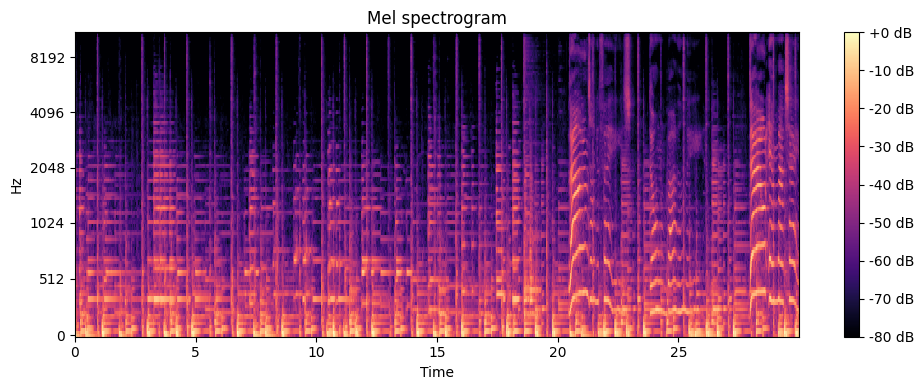

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(t, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [ ]:
import numpy as np
spectrograms = []
for i in range(len(df)):
  spectrograms.append(np.stack(df['melspectrogram'][i]))

spectrograms[0]

array([[6.28145981e+00, 1.50680351e+00, 2.60610491e-01, ...,
        1.53882075e-02, 7.60309910e-03, 1.62066147e-02],
       [3.04223824e+01, 3.53371544e+01, 1.39077759e+01, ...,
        4.52720150e-02, 9.02688783e-03, 2.16255914e-02],
       [2.38344345e+02, 1.36886276e+02, 7.53401184e+01, ...,
        2.20073745e-01, 1.62603796e-01, 3.23807687e-01],
       ...,
       [7.31988475e-02, 1.06185205e-01, 4.77969907e-02, ...,
        1.47459650e-04, 2.66865757e-03, 2.56930351e-01],
       [2.81402357e-02, 2.72249822e-02, 1.01357913e-02, ...,
        7.97449102e-05, 1.29261136e-03, 7.78475329e-02],
       [5.38715953e-03, 2.92616058e-03, 8.19837034e-04, ...,
        1.01225896e-05, 3.08524497e-04, 1.01137320e-02]])

In [ ]:
df['new_spectrograms'] = spectrograms
df.head()

,music_id,music_name,music_lang,music_lyrics,art_id,art_name,art_rank,main_genre,related_genre,related_art,related_music,musicnn_tags,melspectrogram,new_spectrograms
0,3ade68b8g9410afa3,New Perspective,en,I feel the salty waves come in\nI feel them cr...,3ade68b6g2480fda3,Panic! At The Disco,154,Alternative Rock,"['Rock Alternativo', 'Pop/Punk', 'Pop/Rock', '...","[{'id': '3ade68b6gc5baeda3', 'name': 'Fall Out...","[{'id': '3ade68b7gc6144ea3', 'name': 'Wake Me ...","['rock','pop','guitar']","[[6.28145981, 1.50680351, 0.260610491, 0.17753...","[[6.28145981, 1.50680351, 0.260610491, 0.17753..."
1,3ade68b7gb67d7ea3,Renúncia,pt-br,Hoje não existe nada mais entre nós\nSomos dua...,3ade68b5gef48eda3,Nelson Gonçalves,446,MPB,"['MPB', 'Velha Guarda', 'Romântico', 'Samba', ...","[{'id': '3ade68b5gf058eda3', 'name': 'Orlando ...","[{'id': '3ade68b6gbab1fda3', 'name': 'As Rosas...","['male','classical','male vocal']","[[0.905277014, 0.33714968, 0.210445538, 0.1545...","[[0.905277014, 0.33714968, 0.210445538, 0.1545..."
2,3ade68b8gb59f30b3,Turn It Up,en,But don't be alarmed\nWhen the lights come on\...,3ade68b6g415aeda3,Sean Paul,321,Hip Hop,"['Hip Hop', 'Reggae', 'Rap', 'Black Music', 'D...","[{'id': '3ade68b6g28abeda3', 'name': 'Martin S...",[],"['techno','electronic','beat']","[[0.00925674196, 0.0272453353, 0.433711052, 4....","[[0.00925674196, 0.0272453353, 0.433711052, 4...."
3,3ade68b7g90c35ea3,Humano Demais,pt-br,Humano Demais – por Everton Maliska \n\nEu fic...,3ade68b6g7449eda3,Padre Fábio de Melo,169,Gospel/Religious,"['Gospel/Religioso', 'Romântico', 'Trilha Sono...","[{'id': '3ade68b6g9abbfda3', 'name': 'Padre Re...","[{'id': '3ade68b6gc872fda3', 'name': 'Cura-me'...","['guitar','male','male vocal']","[[17.8149872, 9.60394192, 6.78934622, 7.541191...","[[17.8149872, 9.60394192, 6.78934622, 7.541191..."
4,3ade68b7gcbb57ea3,Te Agradeço,pt-br,Por tudo o que Tens feito\nPor tudo o que Vais...,3ade68b6gcb44fda3,Ministério Jovem,414,Gospel/Religious,"['Gospel/Religioso', 'Instrumental', 'Trilha S...","[{'id': '3ade68b7g16350ea3', 'name': 'Ministér...","[{'id': '3ade68b7g4c238ea3', 'name': 'Te Agrad...","['vocal','guitar','slow']","[[18.2767735, 8.62708855, 5.22486877, 6.486338...","[[18.2767735, 8.62708855, 5.22486877, 6.486338..."


In [ ]:
train_df = df[['main_genre','new_spectrograms']]
train_df.head()

,main_genre,new_spectrograms
0,Alternative Rock,"[[6.28145981, 1.50680351, 0.260610491, 0.17753..."
1,MPB,"[[0.905277014, 0.33714968, 0.210445538, 0.1545..."
2,Hip Hop,"[[0.00925674196, 0.0272453353, 0.433711052, 4...."
3,Gospel/Religious,"[[17.8149872, 9.60394192, 6.78934622, 7.541191..."
4,Gospel/Religious,"[[18.2767735, 8.62708855, 5.22486877, 6.486338..."


In [ ]:
train_df['updated_lyrics'] = lyric_corpus
train_df.head()

<ipython-input-19-2f603dcc989d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['updated_lyrics'] = lyric_corpus


,main_genre,new_spectrograms,updated_lyrics
0,Alternative Rock,"[[6.28145981, 1.50680351, 0.260610491, 0.17753...",I feel the salty waves come in I feel them cra...
1,MPB,"[[0.905277014, 0.33714968, 0.210445538, 0.1545...",Hoje não existe nada mais entre nós Somos duas...
2,Hip Hop,"[[0.00925674196, 0.0272453353, 0.433711052, 4....",But don't be alarmed When the lights come on T...
3,Gospel/Religious,"[[17.8149872, 9.60394192, 6.78934622, 7.541191...",Humano Demais – por Everton Maliska Eu fico ...
4,Gospel/Religious,"[[18.2767735, 8.62708855, 5.22486877, 6.486338...",Por tudo o que Tens feito Por tudo o que Vais ...


In [ ]:
train_df = pd.get_dummies(train_df, columns=['main_genre'])
train_df.head()

,new_spectrograms,updated_lyrics,main_genre_Alternative Rock,main_genre_Gospel/Religious,main_genre_Hip Hop,main_genre_Indie,main_genre_MPB,main_genre_Pop,main_genre_Pop/Rock,main_genre_Rock,main_genre_Romantic,main_genre_Sertanejo
0,"[[6.28145981, 1.50680351, 0.260610491, 0.17753...",I feel the salty waves come in I feel them cra...,1,0,0,0,0,0,0,0,0,0
1,"[[0.905277014, 0.33714968, 0.210445538, 0.1545...",Hoje não existe nada mais entre nós Somos duas...,0,0,0,0,1,0,0,0,0,0
2,"[[0.00925674196, 0.0272453353, 0.433711052, 4....",But don't be alarmed When the lights come on T...,0,0,1,0,0,0,0,0,0,0
3,"[[17.8149872, 9.60394192, 6.78934622, 7.541191...",Humano Demais – por Everton Maliska Eu fico ...,0,1,0,0,0,0,0,0,0,0
4,"[[18.2767735, 8.62708855, 5.22486877, 6.486338...",Por tudo o que Tens feito Por tudo o que Vais ...,0,1,0,0,0,0,0,0,0,0


In [ ]:
train_df.columns

Index(['new_spectrograms', 'updated_lyrics', 'main_genre_Alternative Rock',
       'main_genre_Gospel/Religious', 'main_genre_Hip Hop', 'main_genre_Indie',
       'main_genre_MPB', 'main_genre_Pop', 'main_genre_Pop/Rock',
       'main_genre_Rock', 'main_genre_Romantic', 'main_genre_Sertanejo'],
      dtype='object')

In [ ]:
train_df_copy = train_df.copy()

for i in range(len(train_df_copy)):
  if train_df_copy['new_spectrograms'][i].shape[1] < 1292:
    train_df_copy = train_df_copy.drop(index=i)

train_df_copy.head()

,new_spectrograms,updated_lyrics,main_genre_Alternative Rock,main_genre_Gospel/Religious,main_genre_Hip Hop,main_genre_Indie,main_genre_MPB,main_genre_Pop,main_genre_Pop/Rock,main_genre_Rock,main_genre_Romantic,main_genre_Sertanejo
0,"[[6.28145981, 1.50680351, 0.260610491, 0.17753...",I feel the salty waves come in I feel them cra...,1,0,0,0,0,0,0,0,0,0
1,"[[0.905277014, 0.33714968, 0.210445538, 0.1545...",Hoje não existe nada mais entre nós Somos duas...,0,0,0,0,1,0,0,0,0,0
2,"[[0.00925674196, 0.0272453353, 0.433711052, 4....",But don't be alarmed When the lights come on T...,0,0,1,0,0,0,0,0,0,0
3,"[[17.8149872, 9.60394192, 6.78934622, 7.541191...",Humano Demais – por Everton Maliska Eu fico ...,0,1,0,0,0,0,0,0,0,0
4,"[[18.2767735, 8.62708855, 5.22486877, 6.486338...",Por tudo o que Tens feito Por tudo o que Vais ...,0,1,0,0,0,0,0,0,0,0


In [ ]:
len(train_df_copy)

6103

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')
x = tokenizer(train_df_copy['updated_lyrics'].to_list(), padding=True, truncation=True, return_tensors="np")
input_ids = x['input_ids']
attention_mask = x['attention_mask']

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

In [ ]:
a = input_ids.tolist()
a[0]

[101,
 151,
 23333,
 10103,
 20474,
 10158,
 42679,
 10695,
 10104,
 151,
 23333,
 11359,
 26613,
 11423,
 11153,
 28106,
 10110,
 151,
 45074,
 10146,
 151,
 49159,
 11818,
 12175,
 151,
 16332,
 10578,
 112,
 17361,
 13362,
 13997,
 10768,
 112,
 161,
 143,
 52338,
 10111,
 15645,
 11153,
 10827,
 10203,
 17992,
 23225,
 151,
 11811,
 10110,
 69557,
 11526,
 151,
 17576,
 58997,
 151,
 112,
 17361,
 32086,
 10103,
 63246,
 10203,
 12912,
 60416,
 10525,
 10743,
 11312,
 14024,
 118,
 20550,
 10114,
 11335,
 12090,
 10125,
 10525,
 136,
 16292,
 10768,
 10110,
 12421,
 10525,
 46085,
 10197,
 151,
 41604,
 11343,
 143,
 10287,
 10195,
 143,
 10246,
 30227,
 10855,
 10695,
 12396,
 12175,
 151,
 11157,
 12787,
 12828,
 10110,
 151,
 112,
 17361,
 10816,
 77571,
 12787,
 53936,
 44960,
 10110,
 10488,
 11258,
 10107,
 34086,
 33473,
 151,
 41604,
 10346,
 37905,
 10195,
 143,
 10246,
 30227,
 10502,
 20105,
 11628,
 11008,
 10346,
 143,
 12050,
 14653,
 10297,
 36410,
 10525,
 10700,
 1

In [ ]:
type(input_ids)

numpy.ndarray

In [ ]:
b = attention_mask.tolist()
b[0]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
train_df_copy['input_ids'] = a
train_df_copy.head()

,new_spectrograms,updated_lyrics,main_genre_Alternative Rock,main_genre_Gospel/Religious,main_genre_Hip Hop,main_genre_Indie,main_genre_MPB,main_genre_Pop,main_genre_Pop/Rock,main_genre_Rock,main_genre_Romantic,main_genre_Sertanejo,input_ids
0,"[[6.28145981, 1.50680351, 0.260610491, 0.17753...",I feel the salty waves come in I feel them cra...,1,0,0,0,0,0,0,0,0,0,"[101, 151, 23333, 10103, 20474, 10158, 42679, ..."
1,"[[0.905277014, 0.33714968, 0.210445538, 0.1545...",Hoje não existe nada mais entre nós Somos duas...,0,0,0,0,1,0,0,0,0,0,"[101, 25908, 11373, 15901, 21188, 10557, 10405..."
2,"[[0.00925674196, 0.0272453353, 0.433711052, 4....",But don't be alarmed When the lights come on T...,0,0,1,0,0,0,0,0,0,0,"[101, 10502, 11530, 112, 162, 10346, 68859, 10..."
3,"[[17.8149872, 9.60394192, 6.78934622, 7.541191...",Humano Demais – por Everton Maliska Eu fico ...,0,1,0,0,0,0,0,0,0,0,"[101, 30587, 54153, 100, 10190, 56139, 18108, ..."
4,"[[18.2767735, 8.62708855, 5.22486877, 6.486338...",Por tudo o que Tens feito Por tudo o que Vais ...,0,1,0,0,0,0,0,0,0,0,"[101, 10190, 38434, 157, 10126, 11201, 10107, ..."


In [ ]:
train_df_copy['attention_mask'] = b
train_df_copy.head()

,new_spectrograms,updated_lyrics,main_genre_Alternative Rock,main_genre_Gospel/Religious,main_genre_Hip Hop,main_genre_Indie,main_genre_MPB,main_genre_Pop,main_genre_Pop/Rock,main_genre_Rock,main_genre_Romantic,main_genre_Sertanejo,input_ids,attention_mask
0,"[[6.28145981, 1.50680351, 0.260610491, 0.17753...",I feel the salty waves come in I feel them cra...,1,0,0,0,0,0,0,0,0,0,"[101, 151, 23333, 10103, 20474, 10158, 42679, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"[[0.905277014, 0.33714968, 0.210445538, 0.1545...",Hoje não existe nada mais entre nós Somos duas...,0,0,0,0,1,0,0,0,0,0,"[101, 25908, 11373, 15901, 21188, 10557, 10405...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"[[0.00925674196, 0.0272453353, 0.433711052, 4....",But don't be alarmed When the lights come on T...,0,0,1,0,0,0,0,0,0,0,"[101, 10502, 11530, 112, 162, 10346, 68859, 10...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"[[17.8149872, 9.60394192, 6.78934622, 7.541191...",Humano Demais – por Everton Maliska Eu fico ...,0,1,0,0,0,0,0,0,0,0,"[101, 30587, 54153, 100, 10190, 56139, 18108, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,"[[18.2767735, 8.62708855, 5.22486877, 6.486338...",Por tudo o que Tens feito Por tudo o que Vais ...,0,1,0,0,0,0,0,0,0,0,"[101, 10190, 38434, 157, 10126, 11201, 10107, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
from torch.utils.data import Dataset, DataLoader

class CustomImageTextDataset(Dataset):
    def __init__(self, csv_file):
        self.data = csv_file

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        seed = 42
        torch.manual_seed(seed)
        torch.backends.cudnn.deterministic = True
        self.data = self.data.reset_index(drop=True)
        spectrograms = self.data['new_spectrograms'][idx]
        spectrograms = torch.tensor(spectrograms, dtype=torch.float32)
        input_ids = self.data['input_ids'][idx]
        input_ids = np.array(input_ids)
        attention_mask = self.data['attention_mask'][idx]
        attention_mask = np.array(attention_mask)
        #print(spectrograms.size())
        spectrograms = spectrograms.reshape(1, 128, 1292)
        labels = torch.tensor(self.data[['main_genre_Alternative Rock',
       'main_genre_Gospel/Religious', 'main_genre_Hip Hop', 'main_genre_Indie',
       'main_genre_MPB', 'main_genre_Pop', 'main_genre_Pop/Rock',
       'main_genre_Rock', 'main_genre_Romantic', 'main_genre_Sertanejo']].iloc[idx],dtype=torch.float32)
        return input_ids, attention_mask, spectrograms, labels

train_data = train_df_copy.sample(frac=0.80, random_state=42)
test_data = train_df_copy.sample(frac=0.20, random_state=42)


traindata = CustomImageTextDataset(
    csv_file=train_data
)

testdata = CustomImageTextDataset(
    csv_file=test_data
)

# Create a data loader with 32 data points as the batch size
batch_size = 32
train_loader = DataLoader(traindata, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(testdata, batch_size=batch_size, shuffle=True)

In [ ]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import numpy as np
from numpy import argmax
import pandas as pd
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
import torch.nn.functional as F

class LyricModule(nn.Module):
  def __init__(self, pretrained_lyric_model): #, max_seq_len):
    super(LyricModule, self).__init__()

    # # Pretrained lyric model to get lyric embeddings
    self.pretrained = pretrained_lyric_model
    self.embedding_dim = 768

  def forward(self, input_ids, attention_mask):
    '''
    input_ids: shape (batch_size, num_tokens)
    attention_mask: shape (batch_size, num_tokens)

    embeddings: shape (batch_size, num_tokens, embedding_dim)
    pooled: shape (batch_size, embedding_dim)
    '''
    #embeddings = self.pretrained.encode(input_ids, convert_to_tensor=True)
    bert_output = self.pretrained(input_ids,attention_mask)
    embeddings = bert_output.last_hidden_state
    pooled = bert_output.pooler_output

    return embeddings

In [ ]:
from TransformerEncoder import TransformerEncoder

class CMAModule(nn.Module):
  def __init__(self, hyp_params):
    super(CMAModule, self).__init__()

    self.orig_d_l, self.orig_d_a = hyp_params['orig_d_l'], hyp_params['orig_d_a']
    self.d_l, self.d_a = 32, 32
    self.num_heads = hyp_params['num_heads']
    self.layers = hyp_params['layers']
    self.attn_dropout = hyp_params['attn_dropout']
    self.attn_dropout_a = hyp_params['attn_dropout_a']
    self.relu_dropout = hyp_params['relu_dropout']
    self.res_dropout = hyp_params['res_dropout']
    self.out_dropout = hyp_params['out_dropout']
    self.embed_dropout = hyp_params['embed_dropout']
    self.attn_mask = hyp_params['attn_mask']

    combined_dim = self.d_l + self.d_a
    output_dim = hyp_params['output_dim']

    # Init the Layers
    # 1.  Temporal Convolutional Layers
    self.proj_lyrics = nn.Conv1d(self.orig_d_l, self.d_l, kernel_size=1, padding=0, bias=False)
    self.proj_audio = nn.Conv1d(self.orig_d_a, self.d_a, kernel_size=1, padding=0, bias=False)

    # 2. CrossModal Attentions
    self.trans_l_with_a = self.get_network(self_type='la')
    self.trans_a_with_l = self.get_network(self_type='al')

    # 3.  Self Attentions
    self.trans_l_self = self.get_network(self_type='l_mem', layers=3)
    self.trans_a_self = self.get_network(self_type='a_mem', layers=3)

    # Projection layers???
    self.proj1 = nn.Linear(combined_dim, combined_dim)
    self.proj2 = nn.Linear(combined_dim, combined_dim)
    self.out_layer = nn.Linear(combined_dim, output_dim)


  def get_network(self, self_type='l', layers=-1):
      if self_type in ['l', 'al', 'vl']:
          embed_dim, attn_dropout = self.d_l, self.attn_dropout
      elif self_type in ['a', 'la', 'va']:
          embed_dim, attn_dropout = self.d_a, self.attn_dropout_a
      elif self_type == 'l_mem':
          embed_dim, attn_dropout = 1*self.d_l, self.attn_dropout
      elif self_type == 'a_mem':
          embed_dim, attn_dropout = 1*self.d_a, self.attn_dropout
      else:
          raise ValueError("Unknown network type")

      return TransformerEncoder(embed_dim=embed_dim,
                                num_heads=self.num_heads,
                                layers=max(self.layers, layers),
                                attn_dropout=attn_dropout,
                                relu_dropout=self.relu_dropout,
                                res_dropout=self.res_dropout,
                                embed_dropout=self.embed_dropout,
                                attn_mask=self.attn_mask)



  def forward(self, x_l, x_a):
    # x_l : lyrics
    # x_a : audio

    # Using 1D Convolution Layer
    x_a = x_a.transpose(1, 2)
    x_l = x_l.transpose(1, 2)

    proj_x_l = self.proj_lyrics(x_l)
    proj_x_a = self.proj_audio(x_a)
    proj_x_l = proj_x_l.permute(2,0,1)
    proj_x_a = proj_x_a.permute(2,0,1)

    # Cross Modal Attention
    h_l_with_as = self.trans_l_with_a(proj_x_l, proj_x_a, proj_x_a)
    # h_ls = self.trans_l_self(h_l_with_as) # Self Attention
    # last_h_l = last_hs = h_ls[-1]
    last_h_l = h_l_with_as[-1]  # Trying without Self Attention Layers
    # last_l_with_as = torch.flatten(h_l_with_as.permute(1,0,2), start_dim=1)  # 64, 512 * 32

    h_a_with_ls = self.trans_a_with_l(proj_x_a, proj_x_l, proj_x_l)
    # h_as = self.trans_a_self(h_a_with_ls) # Self Attention
    # last_h_a = last_hs = h_as[-1]
    last_h_a = h_a_with_ls[-1]   # Trying without Self Attention Layers
    # last_a_with_ls = torch.flatten(h_a_with_ls.permute(1,0,2), start_dim=1)  # 64, w*h * 32

    last_hs = torch.cat([last_h_l, last_h_a], dim=1)  # Concat both LA and AL
    # last_hs = torch.cat([last_l_with_as, last_a_with_ls], dim=1)  # Concat both LA and AL

    # Trying only L with A
    # last_hs = last_l_with_as

    last_hs_proj = self.proj2(F.dropout(F.relu(self.proj1(last_hs)), p=self.out_dropout, training=self.training))

    last_hs_proj += last_hs

    output = self.out_layer(last_hs_proj)

    return output

In [ ]:
cma_hyp_params = {
    'orig_d_l': 768,  # dimension_lyrics
    'orig_d_a': 96,  # dimension_audio
    'num_heads': 8,   # What is this?
    'layers': 3,
    'attn_dropout': 0.2,
    'attn_dropout_a': 0.2,
    'relu_dropout': 0.2,
    'res_dropout': 0.2,
    'out_dropout': 0.2,
    'embed_dropout': 0.2,
    'attn_mask': False,
    'output_dim': 10
}

In [ ]:
class Multimodal(nn.Module):

    def __init__(self, num_classes, lyric_model):
        super(Multimodal, self).__init__()

        self.num_classes = num_classes
        self.cma_model = CMAModule(cma_hyp_params)
        self.lyric_model = lyric_model

        self.spectrogram_network = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=24, kernel_size=5, stride =1),
            nn.AvgPool2d(2, stride=2),
            nn.Conv2d(in_channels=24, out_channels=48, kernel_size=5, stride =1, padding = 'same' ),
            nn.AvgPool2d(2, stride=2),
            nn.Conv2d(in_channels=48, out_channels=48, kernel_size=5, stride =1, padding = 'same' ),
            nn.AvgPool2d(2, stride=2)
        )

        self.avgpool = nn.AvgPool2d(2, stride=2)
        self.conv4 = nn.Conv2d(in_channels=48, out_channels=96, kernel_size=5, stride =1, padding = 'same')
        self.conv5 = nn.Conv2d(in_channels=96, out_channels=96, kernel_size=5, stride =1, padding = 'same')

        self.linear1 = nn.Linear(256,128)
        self.linear2 = nn.Linear(128,64)
        self.linear3 = nn.Linear(64,num_classes)

    def forward(self, input_ids, attention_mask, spec):
        spectrogram_emb = self.spectrogram_network(spec)
        lyric_emb = self.lyric_model(input_ids, attention_mask)

        spectrogram_embeddings_conv = nn.functional.relu(self.avgpool(self.conv4(spectrogram_emb)))
        spectrogram_embeddings_conv = nn.functional.relu(self.avgpool(self.conv5(spectrogram_embeddings_conv)))

        spectrogram_embeddings_conv = torch.flatten(spectrogram_embeddings_conv, start_dim=2)

        spectrogram_embeddings_conv = spectrogram_embeddings_conv.permute(0, 2, 1)
        output_cma = self.cma_model(lyric_emb, spectrogram_embeddings_conv)

        # x = torch.relu(self.linear1(x))
        # x = torch.relu(self.linear2(x))
        # out = torch.relu(self.linear3(x))
        #out = F.softmax(out, dim=1)
        return output_cma

In [ ]:
lyric_model = LyricModule(pretrained_lyric_model)
model = Multimodal(num_classes = 10, lyric_model = lyric_model)
model = model.float()

# Transfer Model to GPU if available
if torch.cuda.is_available():
    model = model.cuda()

batch_size = 32
epochs = 50
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)

for epoch in range(epochs):
    train_loss = 0.0
    for input_ids, attention_mask, spectrograms, targets in train_loader:

            # Transfer Data to GPU if available
            if torch.cuda.is_available():
                input_ids, attention_mask, spectrograms, targets = input_ids.cuda(), attention_mask.cuda(), spectrograms.cuda(), targets.cuda()

            optimizer.zero_grad()
            #print(inputs.size())
            outputs = model(input_ids, attention_mask, spectrograms)
            # calculate loss
            loss = criterion(outputs, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

            train_loss += loss.item()

    print(f'Epoch {epoch+1} \t\t Training Loss: {train_loss / len(train_loader)}')

    torch.save(model.state_dict(), '/content/drive/MyDrive/multi_modal_genre_classifier/saved_model_multimodal_CMA_10_genres_50ep.pth')

Epoch 1 		 Training Loss: 1.9631258903765212
Epoch 2 		 Training Loss: 1.6600312399708368
Epoch 3 		 Training Loss: 1.5265659779505012
Epoch 4 		 Training Loss: 1.4333014675215179
Epoch 5 		 Training Loss: 1.3483184950024474
Epoch 6 		 Training Loss: 1.2669624460288902
Epoch 7 		 Training Loss: 1.187874775696424
Epoch 8 		 Training Loss: 1.1099507072392631
Epoch 9 		 Training Loss: 1.0303650397101258
Epoch 10 		 Training Loss: 0.9378115032233444
Epoch 11 		 Training Loss: 0.8522835821887247
Epoch 12 		 Training Loss: 0.7597562546044393
Epoch 13 		 Training Loss: 0.6678544900386162
Epoch 14 		 Training Loss: 0.583792945528342
Epoch 15 		 Training Loss: 0.5157775742555756
Epoch 16 		 Training Loss: 0.4571614735851101
Epoch 17 		 Training Loss: 0.42132854968114614
Epoch 18 		 Training Loss: 0.4068203378541797
Epoch 19 		 Training Loss: 0.35782433306080064
Epoch 20 		 Training Loss: 0.31491392091208814
Epoch 21 		 Training Loss: 0.2617867428785056
Epoch 22 		 Training Loss: 0.2152061522299

In [ ]:
genres = ['main_genre_Alternative Rock',
       'main_genre_Gospel/Religious', 'main_genre_Hip Hop', 'main_genre_Indie',
       'main_genre_MPB', 'main_genre_Pop', 'main_genre_Pop/Rock',
       'main_genre_Rock', 'main_genre_Romantic', 'main_genre_Sertanejo']

In [ ]:
from sklearn.metrics import accuracy_score
# Evaluation

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lyric_model = LyricModule(pretrained_lyric_model)

best_model = Multimodal(num_classes = 10, lyric_model = lyric_model)
best_model.load_state_dict(torch.load('/content/drive/MyDrive/multi_modal_genre_classifier/saved_model_multimodal_CMA_10_genres_50ep.pth'))
best_model.to(device)

best_model.eval()
y_pred = []
y_true = []
i = 0
with torch.no_grad():
    for input_ids, attention_mask, spectrograms, targets in test_loader:
        input_ids, attention_mask, spectrograms, targets = input_ids.cuda(), attention_mask.cuda(), spectrograms.cuda(), targets.cuda()
        i += 1
        try:
          outputs = best_model(input_ids, attention_mask, spectrograms)
          y_pred.extend(outputs.cpu().numpy())
          y_true.extend(targets.cpu().numpy())
        except IndexError:
          print(input_ids, attention_mask, spectrograms)
          print(i)
          #print(inputs.shape)

In [ ]:
y_pred[0]

array([-1.5599521 , -7.3148985 , -1.9035548 , -0.65428877, 10.825887  ,
       -2.5883055 ,  3.718402  , -0.13044514,  0.01993706, -0.46287078],
      dtype=float32)

In [ ]:
y_true[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_pred_edited = []
for i in y_pred:
  genre = np.argmax(i)
  y_pred_edited.append(genres[genre])

y_true_edited = []
for i in y_true:
  genre = np.argmax(i)
  y_true_edited.append(genres[genre])

In [ ]:
y_pred_edited[120]

'main_genre_Rock'

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

accuracy = accuracy_score(y_true_edited, y_pred_edited)
precision = precision_score(y_true_edited, y_pred_edited, average='macro')
recall = recall_score(y_true_edited, y_pred_edited, average='macro')
f1 = f1_score(y_true_edited, y_pred_edited, average='macro')
conf_matrix = confusion_matrix(y_true_edited, y_pred_edited)

#Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(conf_matrix)

Accuracy: 0.8435708435708436
Precision: 0.8423377720157872
Recall: 0.8252718583215326
F1 Score: 0.8320109857970358
[[ 51   0   0   2   1   5   2   6   4   0]
 [  0 224   0   0   2   1   1   1   5   0]
 [  0   0  56   1   0   3   0   1   0   1]
 [  1   0   0  40   0   4   0   6   1   1]
 [  1   7   1   0  88   0   6   0   5   9]
 [  3   1   1   2   3 165   1   4   4   2]
 [  0   4   0   0   2  10  63   2   2   0]
 [  3   0   2   1   2   3   2 102   3   1]
 [  1  13   1   1   5   7   4   3 143   9]
 [  0   4   0   0   3   1   1   0   2  98]]


In [ ]:
import itertools
genres = ['Alternative Rock',
       'Gospel/Religious', 'Hip Hop', 'Indie',
       'MPB', 'Pop', 'Pop/Rock',
       'Rock', 'Romantic', 'Sertanejo']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

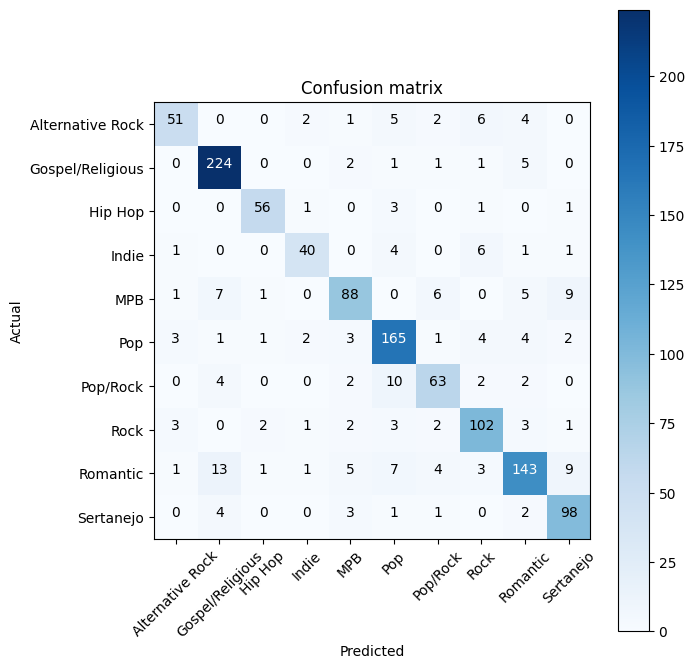

In [ ]:
plot_confusion_matrix(conf_matrix, classes=genres,
                      title='Confusion matrix')

In [ ]:
print(classification_report(y_true_edited,y_pred_edited))

                             precision    recall  f1-score   support

main_genre_Alternative Rock       0.85      0.72      0.78        71
main_genre_Gospel/Religious       0.89      0.96      0.92       234
         main_genre_Hip Hop       0.92      0.90      0.91        62
           main_genre_Indie       0.85      0.75      0.80        53
             main_genre_MPB       0.83      0.75      0.79       117
             main_genre_Pop       0.83      0.89      0.86       186
        main_genre_Pop/Rock       0.79      0.76      0.77        83
            main_genre_Rock       0.82      0.86      0.84       119
        main_genre_Romantic       0.85      0.76      0.80       187
       main_genre_Sertanejo       0.81      0.90      0.85       109

                   accuracy                           0.84      1221
                  macro avg       0.84      0.83      0.83      1221
               weighted avg       0.84      0.84      0.84      1221



In [ ]:
del(input_ids)
del(attention_mask)
del(spectrograms)
del(model)